In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd /content/drive/MyDrive/# DS Capstone/1 AR

/content/drive/.shortcut-targets-by-id/1gqWXVXxyVPSoXJrYLRDV3lFM-rCcuLuy/# DS Capstone/1 AR


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load file
file_path = './data_10y.xlsx'
df = pd.read_excel(file_path)

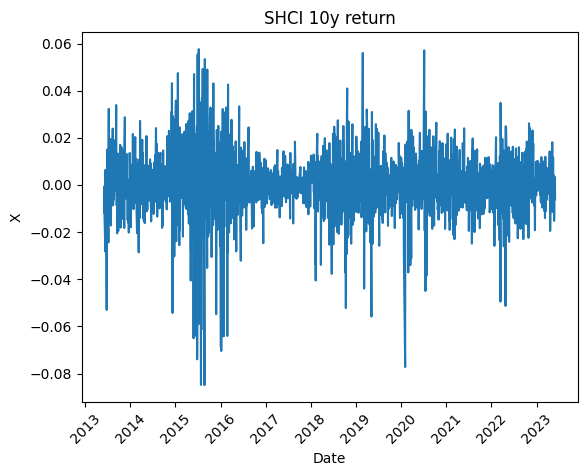

In [ ]:
# Plot the data
plt.plot(df['date'], df['shci_10y'])
plt.xlabel('Date')
plt.ylabel('X')
plt.title('SHCI 10y return')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(df['shci_10y'])

# Extract ADF statistic and p-value
adf_statistic = result[0]
p_value = result[1]

# Print the ADF statistic and p-value
print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')

ADF Statistic: -9.447446957609191
p-value: 4.713817722513363e-16


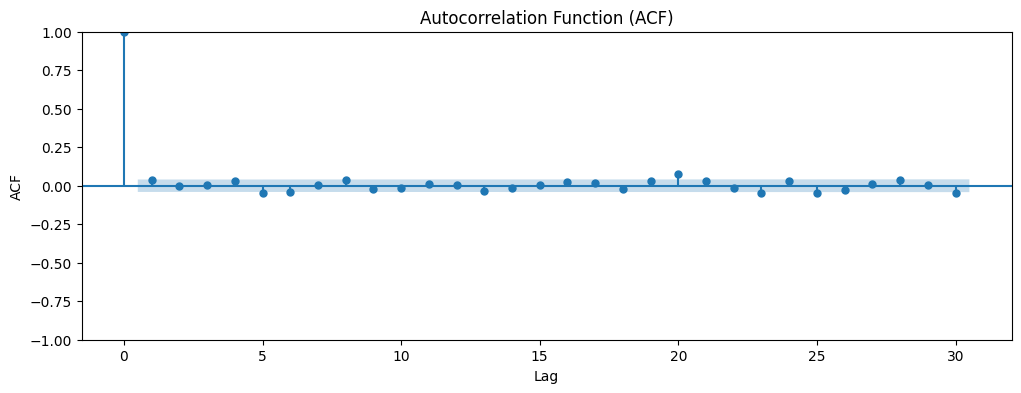

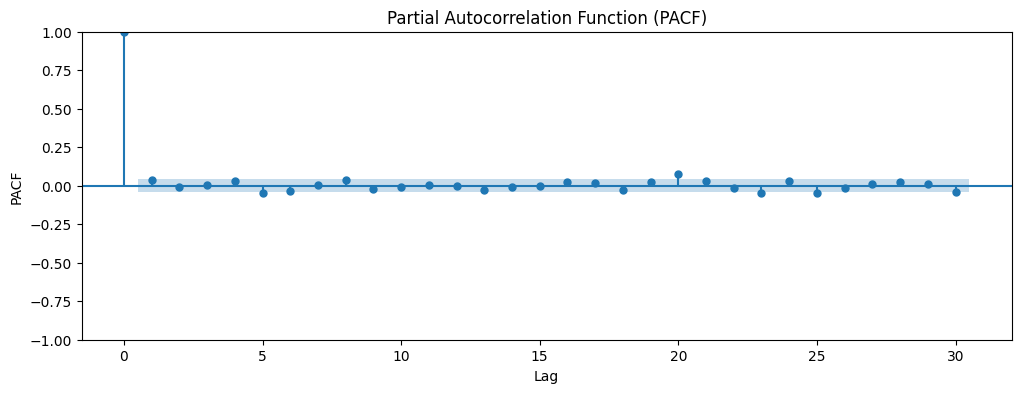

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
fig, ax = plt.subplots(figsize=(12, 4))
plot_acf(df['shci_10y'], ax=ax, lags=30)
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function (ACF)')

# Plot PACF
fig, ax = plt.subplots(figsize=(12, 4))
plot_pacf(df['shci_10y'], ax=ax, lags=30)
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function (PACF)')

# Display the plots
plt.show()

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

# Fit AR(1) model
model = AutoReg(df['shci_10y'], lags=1)
ar_model = model.fit()

# Print model summary
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:               shci_10y   No. Observations:                 2350
Model:                     AutoReg(1)   Log Likelihood                6860.455
Method:               Conditional MLE   S.D. of innovations              0.013
Date:                Tue, 31 Oct 2023   AIC                         -13714.909
Time:                        11:13:53   BIC                         -13697.624
Sample:                             1   HQIC                        -13708.614
                                 2350                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0002      0.000      0.646      0.519      -0.000       0.001
shci_10y.L1     0.0397      0.021      1.927      0.054      -0.001       0.080
                                    Roots       

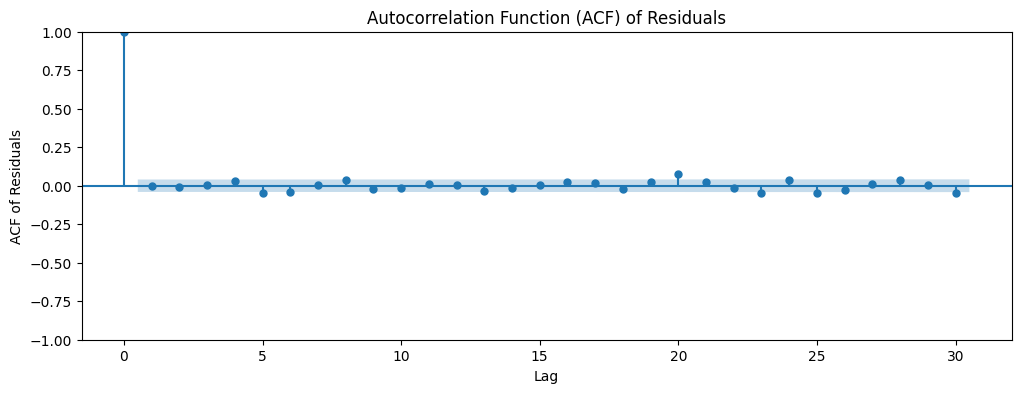

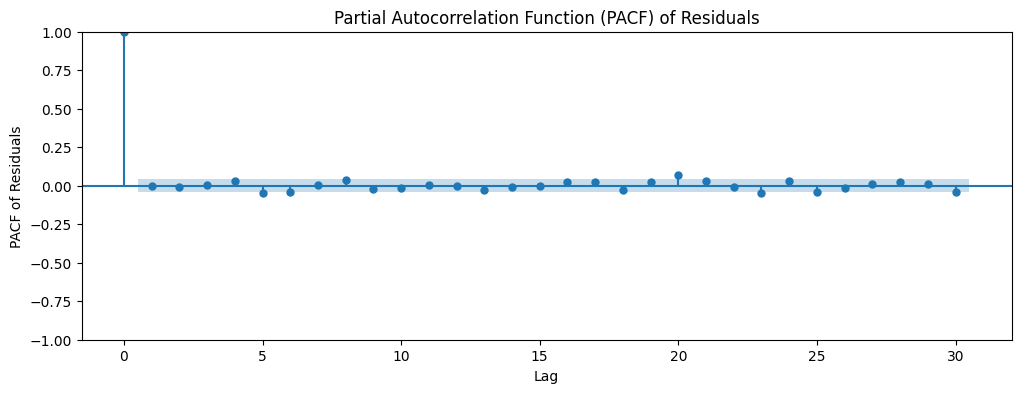

In [ ]:
# Get the residuals
residuals = ar_model.resid

# Plot ACF of residuals
fig, ax = plt.subplots(figsize=(12, 4))
plot_acf(residuals, ax=ax, lags=30)
plt.xlabel('Lag')
plt.ylabel('ACF of Residuals')
plt.title('Autocorrelation Function (ACF) of Residuals')

# Plot PACF of residuals
fig, ax = plt.subplots(figsize=(12, 4))
plot_pacf(residuals, ax=ax, lags=30)
plt.xlabel('Lag')
plt.ylabel('PACF of Residuals')
plt.title('Partial Autocorrelation Function (PACF) of Residuals')

# Display the plots
plt.show()

Mean Squared Error (MSE): 0.0001571027463758635


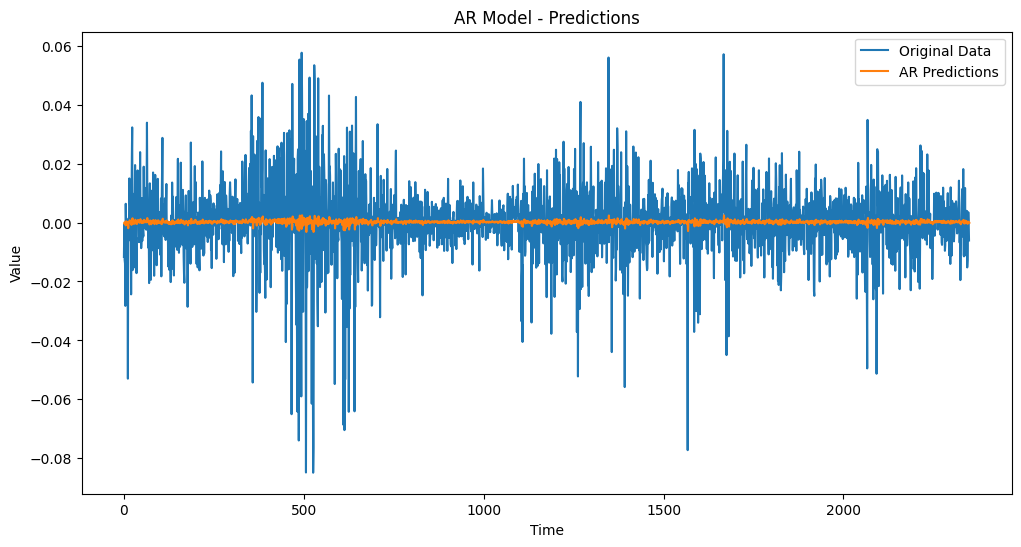

In [ ]:
from sklearn.metrics import mean_squared_error

# Make predictions on the entire dataset
predictions = ar_model.predict(start=1, end=len(df))

# Calculate mean squared error (MSE)
mse = mean_squared_error(df['shci_10y'], predictions)
print(f"Mean Squared Error (MSE): {mse}")

# Plot the original data and predictions
plt.figure(figsize=(12, 6))
plt.plot(df['shci_10y'], label='Original Data')
plt.plot(predictions, label='AR Predictions')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('AR Model - Predictions')
plt.legend()

# Display the plot
plt.show()